# 수치미분
우리가 수학시간에 배운 미분은 해석적미분.
최대한 근사치로 수치를 얻어내서 수치미분이라고함.

In [ ]:
import numpy as np

def numerical_diff(f,x):
  h = 1e-50
  return (f(x+h)-f(x)) / h

# 컴퓨터 입장에서 좋은 미분은 아님.

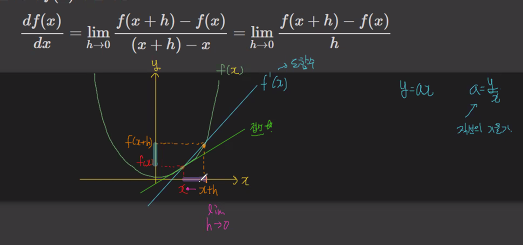

In [ ]:
# h가 클수록 정확한 미분값(접선의 기울기= 순간변화량)을 구하기 힘들어지는데

np.float32(1e-45)
# 45까지만 지원하기 때문.
# 그래서 1/ e-50하면 무한대 오류

1e-45

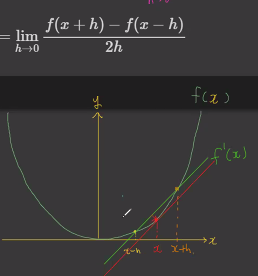

중앙차분 사용하면됨
h가 조금은 커도 상관없다! 평행이동할거라서

# 중앙차분 이용하기 ⭐⭐
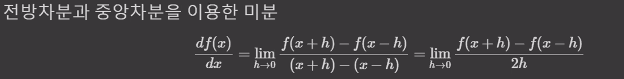

In [ ]:
def numerical_diff(f,x):
  h = 1e-4 # 수학자들이 연구한 젤좋은숫자 우리도 왜이런지 모름
  return (f(x+h) - f(x-h)) / (2 * h)

# 도함수
$f^{\prime}({x})$

$f(x) = 2x^2 + x + 3$
$f^{\prime}({x}) = 4x + 1$

In [ ]:
def function_1(x):
  return 2*x**2 + x+ 3

In [ ]:
# x = 5일때 미분값보자
numerical_diff(function_1, 5)

20.999999999986585

In [ ]:
# f'(x)
def df(x):
  return 4*x + 1

df(5)

21

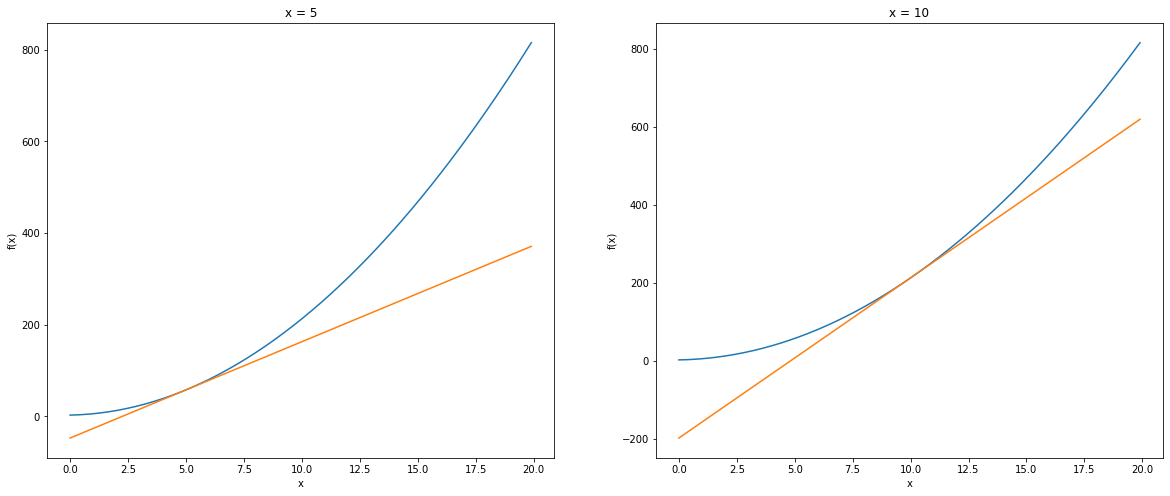

In [ ]:
# 미분값을 이용한 접선 시각화
import matplotlib.pyplot as plt

def tangent_line(f, x): # 접선의방정식 구해주는 함수
    d = numerical_diff(f, x) # 접선의 기울기 f'(5)
    y = f(x) - d*x # f(5) - f'(5)5
    return lambda t: d*t + y # 접선의 방정식  f'(5)t + f(5)-f'(5)5 = f'(5)(x-5) + f(5)

    
fig, axes = plt.subplots(1,2, figsize=(20,8))

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
axes[0].set_xlabel("x")
axes[0].set_ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

axes[0].plot(x, y)
axes[0].plot(x, y2)
axes[0].set_title("x = 5")

axes[1].set_xlabel("x")
axes[1].set_ylabel("f(x)")

tf = tangent_line(function_1, 10)
y2 = tf(x)

axes[1].plot(x, y)
axes[1].plot(x, y2)
axes[1].set_title("x = 10")
plt.show()



# 편미분
* 위의 예시 에서는 $x$(인수)가 1개
* 2개 이상의 인수에 대한 미분을 편미분 이라고 한다.
* 한 쪽만 미분 하는 것
  * 여러 개의 인수 중 하나만 미분 하는 것

$$
f(x_0, x_1) = x^2_0 + x^2_1
$$

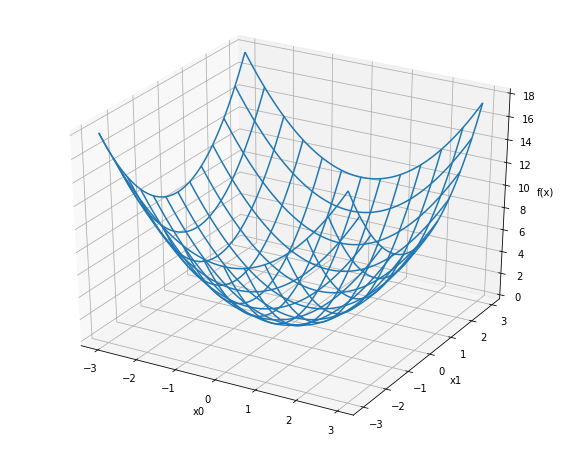

In [58]:
# x : 배열
def function_2(x):
  return x[0]**2 + x[1]**2

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

X0 = np.arange(-3, 3, 0.05)
X1 = np.arange(-3, 3, 0.05)

X0, X1 = np.meshgrid(X0, X1)
Z = function_2([X0,X1])

ax.plot_wireframe(X=X0, Y=X1, Z=Z,rstride=10, cstride=10)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('f(x)')
plt.show()

## 문제 1
$x_0=3, x_1=4$ 일 때 $x_0$에 대한 편미분 $\frac{\partial f}{\partial x_0}$

편미분한거에 x0 = 3넣으면됨!



In [31]:
# 도함수 직접 쓰지말고 풀어봐라!

def f(x):  # 일단 x1에 4넣고!
  return x*x + 4**2

numerical_diff(f, 3) # 이제 x0로 미분해서 3넣어라

6.00000000000378

In [32]:
def f(x):
  return 3**2 + x**2  # 먼저 x0에 3넣고

numerical_diff(f,4)  # x1으로 미분해서 4넣기

7.999999999999119

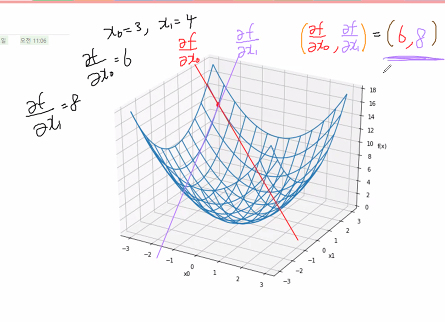

[6,8] 기울기벡터 방향벡터

# 기울기( gradient )
* $x_0$에 대한 기울기와, $x_1$의 기울기를 따로따로 구해서 확인
  * $x_0=3, x_1=4$ 일때의 미분을 각각 구함
  * $\frac{\partial f}{\partial x_0}$, $\frac{\partial f}{\partial x_1}$ 각각 구해봄
* 각 방향의( $x_0$, $x_1$ ) 기울기를 하나로 묶어서 벡터화 시킨다.⭐
  * 즉 우리는 $(\frac{\partial f}{\partial x_0},\frac{\partial f}{\partial x_1})$를 구할 것이다.
  * 방향을 알 수 있게 된다.
    * 어디로 가야 함수의 최소 지점으로 갈 수 있는가?

In [59]:
# f = 미분할 함수 x0^2 + x1^2
# x = 좌표배열 [x0, x1] = [3,4]

# numerical_gradient의 목표 = 기울기배열[df/dx0, df/dx1] 만들어내기!

def numerical_gradient(f,x):
  h = 1e-4
  grads = np.zeros_like(x)  # zeros_like(x)는 x의 shape과 동일한 0이 채워진 배열 만들기
  
  for idx in range(x.size):
    
    # 편미분 수행할 값 꺼내오기.
      tmp_value = x[idx]  # 처음 x0에 대해서 미분할거야!
      
      # f(x+h)
      x[idx] = float(tmp_value) + h    # x0값 = x0값 + h로 넣어라
      fxh1 = f(x) # x=[3+h, 4]가 들어있는 상태 이 x를 f에 넣어라
      # fxh1 = (3+h)^2 + 4^2

      # f(x-h)
      x[idx] = float(tmp_value) - h   # x0값 - h
      fxh2 = f(x)  # x=[x0-h, 4]가 들어있는 상태 f에 넣어라.
      # fxh2 = (3-h)^2 + 4^2

      grads[idx] = (fxh1 - fxh2) / (2*h)
      x[idx] = tmp_value # 원상복구 하고 다시 for문돌려!


  return grads


In [64]:
x = np.array([3, 4])

numerical_gradient(function_2,x)

array([25000, 35000])

In [63]:
x = np.array([3.0, 4.0])

numerical_gradient(function_2,x)

array([6., 8.])

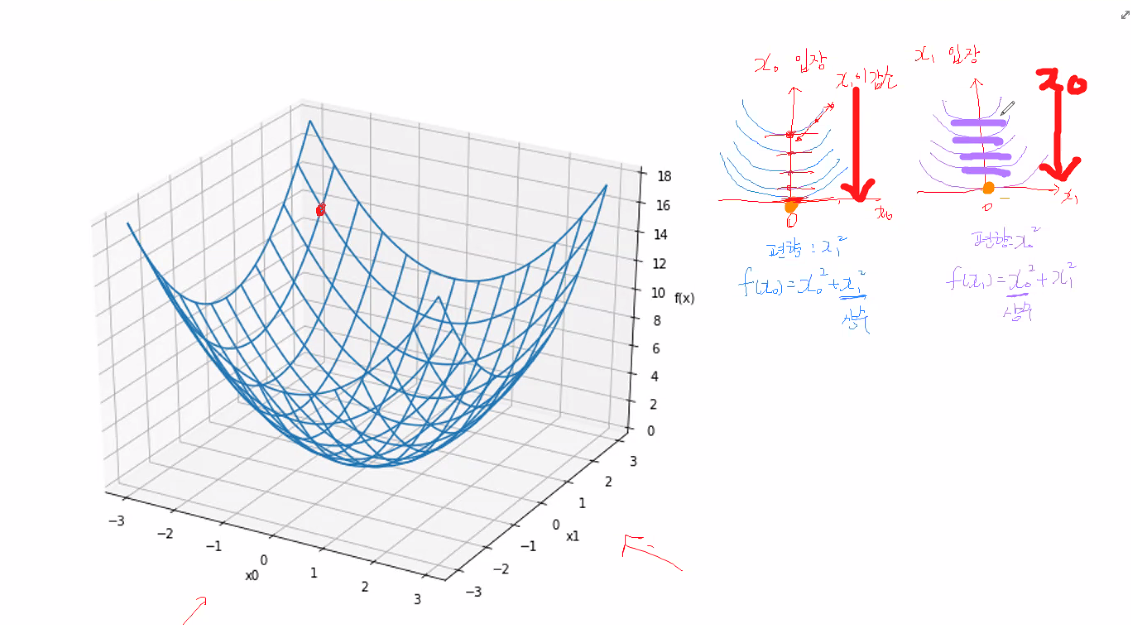

x0는 0이 되어야하고 x1은 점점 감소해야


x1는 0이 되어야하고 x0는 점점 감소해야

In [65]:
x = np.array([2.0, 3.0])
numerical_gradient(function_2,x)
# 기울기가 내려갔다! 경사가 낮아졌다. 최소값에 가까이가고있다

array([4., 6.])

# 경사하강법(Gradient Descent)
* 기울기를 점진적으로 줄여나가는 방법
* 손실(Loss)을 최소로 하기위한 매개변수 W, b를 구해나가는 과정
* 최적화(Optimization)라고 한다.

$$
x_0 = x_0 - \eta \frac{∂f}{∂x_0}
$$

$$
x_1 = x_1 - \eta \frac{∂f}{∂x_1}
$$

* $\eta$ : Learning Rate. 현 위치에서의 미분값을 얼마나 반영할지에 대한 비율

In [66]:
def gradient_descent(f, init_x, lr=0.01, step=100): # step 경사하강법 수행횟수. 갱신을 몇번할꺼니?
  x = init_x

  for i in range(step):
    # 1. 기울기 배열 구하기
    grads = numerical_gradient(f, x)
    print("x 좌표 : {} / 기울기 : {}".format(x, grads))
    
    # 2. 갱신
    x = x - lr*grads
    
  return x

In [67]:
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x, lr=0.1)

x 좌표 : [-3.  4.] / 기울기 : [-6.  8.]
x 좌표 : [-2.4  3.2] / 기울기 : [-4.8  6.4]
x 좌표 : [-1.92  2.56] / 기울기 : [-3.84  5.12]
x 좌표 : [-1.536  2.048] / 기울기 : [-3.072  4.096]
x 좌표 : [-1.2288  1.6384] / 기울기 : [-2.4576  3.2768]
x 좌표 : [-0.98304  1.31072] / 기울기 : [-1.96608  2.62144]
x 좌표 : [-0.786432  1.048576] / 기울기 : [-1.572864  2.097152]
x 좌표 : [-0.6291456  0.8388608] / 기울기 : [-1.2582912  1.6777216]
x 좌표 : [-0.50331648  0.67108864] / 기울기 : [-1.00663296  1.34217728]
x 좌표 : [-0.40265318  0.53687091] / 기울기 : [-0.80530637  1.07374182]
x 좌표 : [-0.32212255  0.42949673] / 기울기 : [-0.64424509  0.85899346]
x 좌표 : [-0.25769804  0.34359738] / 기울기 : [-0.51539608  0.68719477]
x 좌표 : [-0.20615843  0.27487791] / 기울기 : [-0.41231686  0.54975581]
x 좌표 : [-0.16492674  0.21990233] / 기울기 : [-0.32985349  0.43980465]
x 좌표 : [-0.1319414   0.17592186] / 기울기 : [-0.26388279  0.35184372]
x 좌표 : [-0.10555312  0.14073749] / 기울기 : [-0.21110623  0.28147498]
x 좌표 : [-0.08444249  0.11258999] / 기울기 : [-0.16888499  0.22517998]
x 좌표 

array([-6.11110793e-10,  8.14814391e-10])

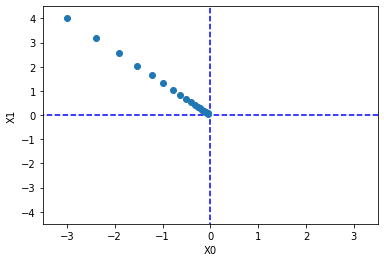

In [68]:
import numpy as np
import matplotlib.pylab as plt


def gradient_descent(f, init_x, lr=0.01, step_num=100):
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x, np.array(x_history)

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

In [71]:
x_history

array([[-3.        ,  4.        ],
       [-2.4       ,  3.2       ],
       [-1.92      ,  2.56      ],
       [-1.536     ,  2.048     ],
       [-1.2288    ,  1.6384    ],
       [-0.98304   ,  1.31072   ],
       [-0.786432  ,  1.048576  ],
       [-0.6291456 ,  0.8388608 ],
       [-0.50331648,  0.67108864],
       [-0.40265318,  0.53687091],
       [-0.32212255,  0.42949673],
       [-0.25769804,  0.34359738],
       [-0.20615843,  0.27487791],
       [-0.16492674,  0.21990233],
       [-0.1319414 ,  0.17592186],
       [-0.10555312,  0.14073749],
       [-0.08444249,  0.11258999],
       [-0.06755399,  0.09007199],
       [-0.0540432 ,  0.07205759],
       [-0.04323456,  0.05764608]])

In [69]:
# 학습률이 너무 클 때 lr=10.0
result, _ = gradient_descent(function_2, init_x, lr=10.0)
print("Learning Rate 10.0 : {}".format(result))

# 기울기 발산, 기울기 폭주 : 오히려 튕겨서 올라가버림

Learning Rate 10.0 : [ 3.98264457e+12 -6.43085837e+12]


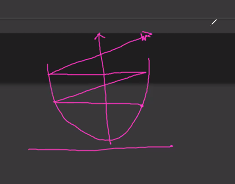

In [70]:
init_x = np.array([-3.0, 4.0])

# 학습률이 너무 작을 때 lr=1e-10
result, _ = gradient_descent(function_2, init_x, lr=1e-10)
print("Learning Rate 1e-10 : {}".format(result))

Learning Rate 1e-10 : [-2.99999994  3.99999992]


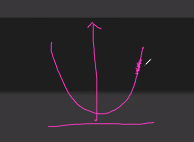

요만큼만 하고 갱신 멈춤 갱신거의안돼